In [22]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from jupyterthemes import jtplot
import luit as lt

jtplot.style(theme='grade3')

In [4]:
#User-supplied
summaoutfile = '/glade/p/work/manab/fcast/PNW/output/newsumma/final.nc'   #Output file from SUMMA
#routefile = '/glade/p/work/manab/fcast/PNW_route/output/q_out.nc'       #Output file from MizuRoute
polyshp = '/glade/p/work/manab/fcast/data/shapefile/Region_17_merged_hru.shp'  #Polygon shapefile
segshp =  '/glade/p/work/manab/fcast/data/shapefile/Region17_merged_seg.shp'   #Segment shapefile

## Imports SUMMA and MizuRoute output, Polygon shapefile, and Reach shapefile

In [16]:
summaout = xr.open_dataset(summaoutfile).set_index(hru = 'hruId')        #Imports the SUMMA outfile
print(summaout)

<xarray.Dataset>
Dimensions:                 (hru: 11723, midToto: 8, time: 19248)
Coordinates:
  * time                    (time) datetime64[ns] 2010-06-01 ...
  * hru                     (hru) int64 17000001 17000002 17000003 17000004 ...
Dimensions without coordinates: midToto
Data variables:
    pptrate                 (time, hru) float64 ...
    airtemp                 (time, hru) float64 ...
    spechum                 (time, hru) float64 ...
    windspd                 (time, hru) float64 ...
    SWRadAtm                (time, hru) float64 ...
    LWRadAtm                (time, hru) float64 ...
    airpres                 (time, hru) float64 ...
    nSnow                   (time, hru) int32 ...
    nSoil                   (time, hru) int32 ...
    nLayers                 (time, hru) int32 ...
    numberFluxCalc          (time, hru) int32 ...
    scalarSWE               (time, hru) float64 ...
    scalarAquiferStorage    (time, hru) float64 ...
    scalarCosZenith         (time, 

In [19]:
#Extracts SUMMA variable for all 11723 HRUs at a particular timestep
summasel = summaout.isel(time = 50)['pptrate'].drop('time').to_dataframe()  
print(summasel.head(4))

          pptrate
hru              
17000001      0.0
17000002      0.0
17000003      0.0
17000004      0.0


In [9]:
polydat = gpd.read_file(polyshp)                #Imports the polygon shapefile
polydat.head(2)

,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry
0,1,23336004,17a,1829.0,17000001,2.213807e+06,-1.665466e+06,1.202901e+08,17001133,1890.24521,-116.20479,41.33139,POLYGON ((-1661303.114800001 2221244.977600001...
1,2,23198872,17a,1902.0,17000002,2.214667e+06,-1.555784e+06,1.248356e+08,17000804,1959.87124,-114.91219,41.53916,"(POLYGON ((-1532954.8961 2215904.7739, -153295..."


In [11]:
segdat = gpd.read_file(segshp)                  #Imports the segment shapefile
segdat.head(2)

,DrainID,Region,tosegment2,tosegment,seg_id,seg_id2,POI_ID,TOCOMID2,To_POI_ID,ToFTYPE,...,start_y,TopElev,start_lon,start_lat,end_x,end_y,BotElev,end_lon,end_lat,geometry
0,5447,17,17906894,6894,6892,17906892,0.0,0,0,None,...,3498210.0,1002.0,-119.58342,52.73771,-1605930.0,3495300.0,776.0,-119.24664,52.76475,"LINESTRING (-1629435 3498210.000000002, -16291..."
1,5448,17,17906894,6894,6893,17906893,0.0,0,0,None,...,3490490.0,801.0,-119.26432,52.71579,-1605930.0,3495300.0,776.0,-119.24664,52.76475,"LINESTRING (-1608405 3490485.000000004, -16084..."


# Merging SUMMA output into polygon shapefile

In [27]:
summasel['hru_id2'] = summasel.index   # 
print(summasel.index)

polydat = pd.merge(polydat, summasel)  #
polydat.head(2)

Int64Index([17000001, 17000002, 17000003, 17000004, 17000005, 17000006,
            17000007, 17000008, 17000009, 17000010,
            ...
            17906157, 17906158, 17906159, 17906160, 17906161, 17906162,
            17906163, 17906164, 17906165, 17906166],
           dtype='int64', name='hru', length=11723)


,OBJECTID,POI_ID,PROD_UNIT,hru_elev,hru_id2,Y_Centroid,X_Centroid,Basin_Area,seg_hru_id,Elev_Avg,Lon_Centro,Lat_Centro,geometry,pptrate
0,1,23336004,17a,1829.0,17000001,2.213807e+06,-1.665466e+06,1.202901e+08,17001133,1890.24521,-116.20479,41.33139,POLYGON ((-1661303.114800001 2221244.977600001...,0.0
1,2,23198872,17a,1902.0,17000002,2.214667e+06,-1.555784e+06,1.248356e+08,17000804,1959.87124,-114.91219,41.53916,"(POLYGON ((-1532954.8961 2215904.7739, -153295...",0.0


# Plot SUMMA Output

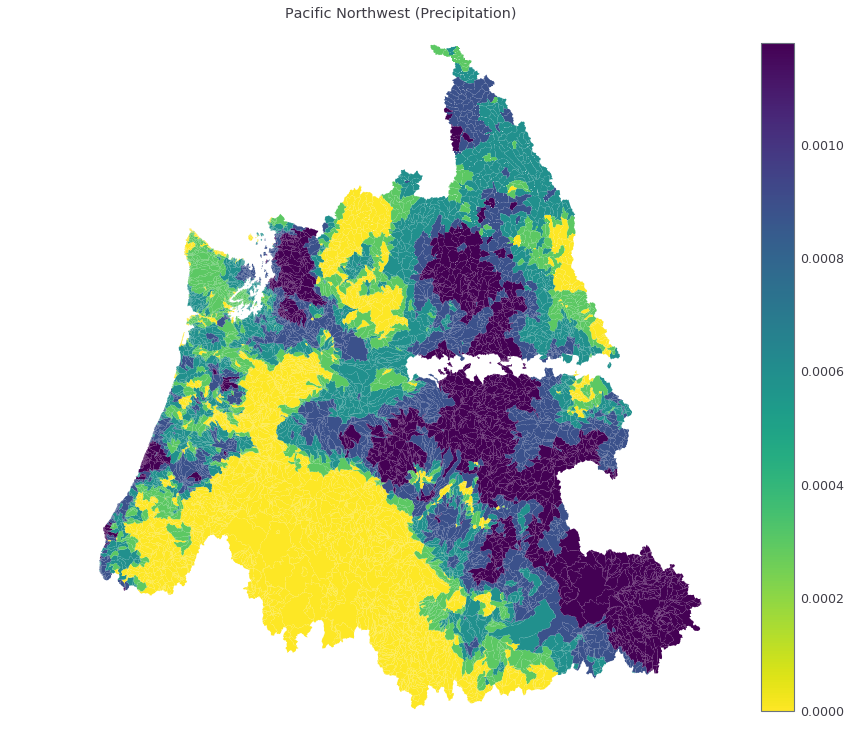

In [50]:
fig, ax = plt.subplots(1, figsize=(13, 13))
polydat.plot(ax = ax, column = 'pptrate', cmap='viridis_r', scheme='quantiles')
ax.set_title('Pacific Northwest (Precipitation)')
#Prepare colorbar
vmin = polydat['pptrate'].min()
vmax = polydat['pptrate'].max()
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
plt.colorbar(sm, fraction=0.046, pad=0.04)
#Set axes
ax.set_ylim([-90, 90])
ax.set_axis_off()
plt.axis('equal');

# Plot MizuRoute output